## Explainable AI: Bias Detection for the UCI Adult Income Dataset

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data



In [ ]:
# pip install pandas numpy shap scikit-learn matplotlib
!pip install shap

In [ ]:
import pandas as pd # Data manipulation and analysis
import numpy as np # Numerical Computing
import shap # Explainable AI and Model Interpretability
from sklearn.model_selection import train_test_split # Splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder, StandardScaler # Encoding Categorical Labels, Feature Scaling
from sklearn.linear_model import LogisticRegression # Classification
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve, auc # Model Evaluation
import matplotlib.pyplot as plt

### SHAP:
(SHapley Additive exPlanations) is a library used to explain the output of machine learning models. It helps in understanding the contribution of each feature to the model's predictions, providing insights into how the model is making decisions. This is particularly useful for making models more transparent and interpretable.

In [ ]:
# Loading Dataset into the Notebook

# Load UCI Adult Income Dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
                'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
                'hours_per_week', 'native_country', 'income']
df = pd.read_csv(url, header=None, names=column_names, na_values=' ?', skipinitialspace=True)

In [ ]:
# Data Preprocessing


# Drop rows with missing values
df.dropna(inplace=True)

# Convert 'income' to binary labels (0 for <=50K, 1 for >50K)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Encode categorical features
label_encoders = {}
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation',
                       'relationship', 'race', 'sex', 'native_country']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop('income', axis=1)
y = df['income']

In [ ]:
# Training XAI Model

# Normalize numerical columns
scaler = StandardScaler()
X[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']] = scaler.fit_transform(
    X[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']])

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.71      0.46      0.56      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.83      0.81      6513



In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')


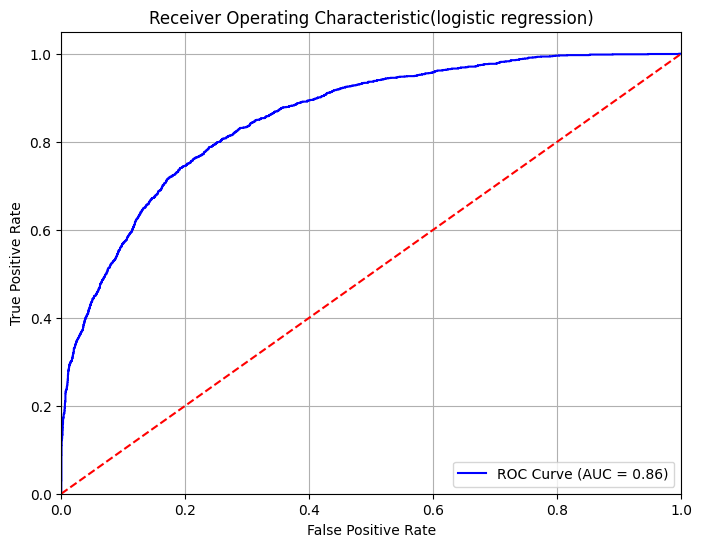

In [ ]:
y_scores1 = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores1, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  #
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(logistic regression)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, roc_curve,auc
import matplotlib.pyplot as plt
import xgboost as xgb

In [ ]:
"""

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set the parameters for XGBoost
params = {
     'objective':'binary:logistic',  # Specify multiclass classification
    #'num_class': 2,                 # Number of classes
    'eta': 0.1,                     # Learning rate
    'max_depth': 3,                 # Maximum depth of a tree
    'eval_metric': 'mlogloss',      # Evaluation metric
}

# Train the model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred2 = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy:.2f}')
#print(classification_report(y_test, y_pred2))"""

"\n\ndtrain = xgb.DMatrix(X_train, label=y_train)\ndtest = xgb.DMatrix(X_test)\n\n# Set the parameters for XGBoost\nparams = {\n     'objective':'binary:logistic',  # Specify multiclass classification\n    #'num_class': 2,                 # Number of classes\n    'eta': 0.1,                     # Learning rate\n    'max_depth': 3,                 # Maximum depth of a tree\n    'eval_metric': 'mlogloss',      # Evaluation metric\n}\n\n# Train the model\nnum_round = 100\nbst = xgb.train(params, dtrain, num_round)\n\n# Make predictions\ny_pred2 = bst.predict(dtest)\n\n# Evaluate the model\naccuracy = accuracy_score(y_test, y_pred2)\nprint(f'Accuracy: {accuracy:.2f}')\n#print(classification_report(y_test, y_pred2))"

In [ ]:
"""from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred2, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  #
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(XGBoost)')
plt.legend(loc='lower right')
plt.grid()
plt.show()"""

"from sklearn.metrics import roc_curve, auc\n\nfpr, tpr, thresholds = roc_curve(y_test, y_pred2, pos_label=1)\nroc_auc = auc(fpr, tpr)\n\nplt.figure(figsize=(8, 6))\nplt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')\nplt.plot([0, 1], [0, 1], color='red', linestyle='--')  #\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('Receiver Operating Characteristic(XGBoost)')\nplt.legend(loc='lower right')\nplt.grid()\nplt.show()"

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train, y_train)

# Make predictions



RandomForestClassifier(random_state=42)

In [ ]:
y_pred3 = rf1.predict(X_test)


rf1.score(X_test,y_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.75      0.64      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513



In [ ]:
print("Confusion matrix is: \n",confusion_matrix(y_test,y_pred3))

Confusion matrix is: 
 [[4604  338]
 [ 559 1012]]


<Axes: >

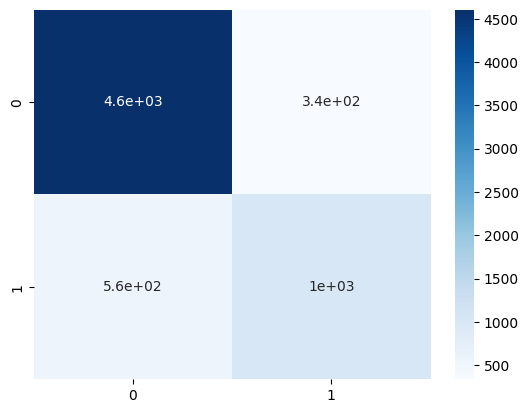

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True,cmap='Blues')


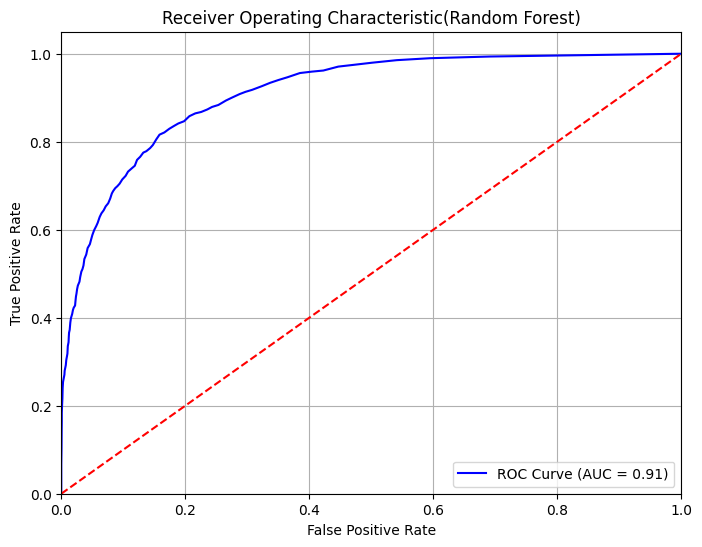

In [ ]:
y_scores3 = rf1.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores3, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  #
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(Random Forest)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
from sklearn.svm import SVC
svc1=SVC()
svc1.fit(X_train,y_train)

y_pred4 = svc1.predict(X_test)


svc1.score(X_test,y_test)
print(classification_report(y_test, y_pred4))

accuracy_score(y_test,y_pred4)

print("Confusion matrix is: \n",confusion_matrix(y_test,y_pred4))

sns.heatmap(confusion_matrix(y_test,y_pred4),annot=True,cmap='Blues')

from sklearn.metrics import roc_curve, auc
#y_scores4 = svc1.predict_proba(X_test)[:, 1]

#fpr, tpr, thresholds = roc_curve(y_test, y_scores4, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred4, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  #
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic( SVC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
# Use SHAP for explainability
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


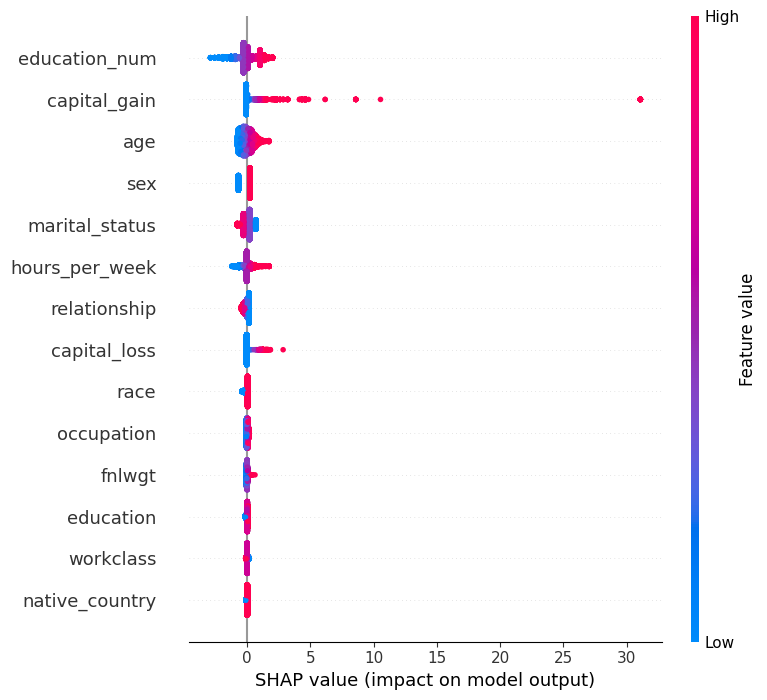

In [ ]:
# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [ ]:
# Analyze SHAP values for a single prediction (e.g., first prediction)
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :], feature_names=X.columns)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


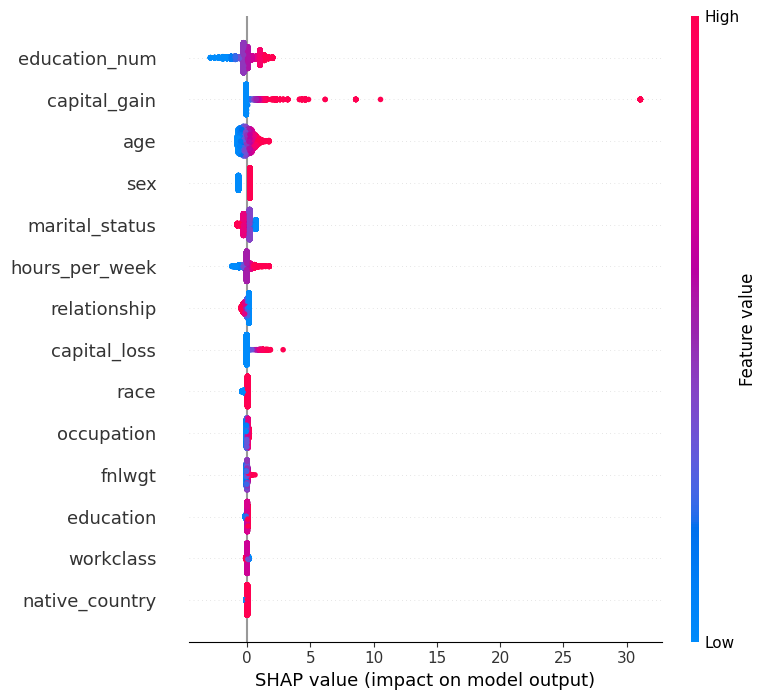

In [ ]:
# Use SHAP for explainability
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

# Initialize JS visualization for SHAP
shap.initjs()  # This line ensures that the necessary JavaScript is loaded

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Analyze SHAP values for a single prediction (e.g., first prediction)
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :], feature_names=X.columns)

In [ ]:
# Use SHAP for explainability
explainer = shap.LinearExplainer(rf1, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

# Initialize JS visualization for SHAP
shap.initjs()  # This line ensures that the necessary JavaScript is loaded

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Analyze SHAP values for a single prediction (e.g., first prediction)
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :], feature_names=X.columns)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


InvalidModelError: An unknown model type was passed: <class 'sklearn.ensemble._forest.RandomForestClassifier'>

In [ ]:
# Use SHAP for explainability
# Instead of LinearExplainer, use TreeExplainer for tree-based models like RandomForestClassifier
explainer = shap.TreeExplainer(rf1)
shap_values = explainer.shap_values(X_test)

# Initialize JS visualization for SHAP
shap.initjs()  # This line ensures that the necessary JavaScript is loaded

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Analyze SHAP values for a single prediction (e.g., first prediction)
# For TreeExplainer, expected_value is accessed as explainer.expected_value[0] for binary classification or explainer.expected_value[class_index] for multi-class.
# Assuming binary classification here
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0, :], feature_names=X.columns)

In [ ]:
import shap
import sklearn

# Assuming you have your trained SVC model stored in the 'model' variable
# and your data in X_train and X_test

# 1. Choose the appropriate explainer:
# For SVC models, especially with non-linear kernels, KernelExplainer is often preferred
explainer = shap.KernelExplainer(svc1.predict_proba, X_train) # Use predict_proba for probabilities or predict for raw predictions
# Alternatively, you can use: explainer = shap.Explainer(model.predict_proba, X_train) # Uses a model-agnostic approach

# 2. Calculate SHAP values:
shap_values = explainer.shap_values(X_test)

# 3. Visualize the results:
# Summary plot:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Force plot for a single prediction (e.g., the first prediction):
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[0,:], feature_names=X_test.columns) # Assuming binary classification

# Dependence plot for a specific feature (e.g., 'feature_name'):
shap.dependence_plot("feature_name", shap_values[0], X_test, feature_names=X_test.columns)

In [ ]:
# Export or Save Images

# Save the SHAP force plot as an HTML file
# shap.save_html("shap_force_plot.html", shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :], feature_names=X.columns))


## Conclusion:
### SHAP Summary Plot:
* The summary plot ranks features by their importance in the model and shows their influence (positive or negative) on the prediction of whether a person earns more than $50K.
* Each dot on the summary plot represents a SHAP value for a single prediction. Dots are colored by the value of the feature (e.g., blue for low values, red for high values).

### SHAP Force Plot:
* The force plot shows how each feature pushes the model's prediction towards earning more than $50K (positive class) or less than $50K (negative class) for a single prediction.
* Features that push the prediction towards the positive class are on the right (red), while those pushing towards the negative class are on the left (blue).

### Interpreting Bias:
#### Potential Gender Bias:
* Look at the sex feature in the summary plot: If the sex feature has a significant impact on the model's predictions, with large SHAP values, it could indicate that gender is influencing income predictions.
* If women (coded as 0) consistently push the model toward the "less than $50K" class, while men (coded as 1) push it toward the "greater than $50K" class, this could be a sign of gender bias.

* Conclusion: If the SHAP summary plot shows that sex plays a large role in determining income (with a large spread of SHAP values), this indicates that the model may be biased based on gender. The model might disproportionately predict lower incomes for women even when other factors (like education or work hours) are similar to men's.

### Potential Racial Bias:
* Similarly, examine the race feature in the summary plot: If race has a strong influence on the predictions, particularly if certain racial groups consistently push the prediction toward lower or higher income classes, this might indicate racial bias.
* Conclusion: If race appears high in the summary plot and disproportionately affects predictions for certain racial groups, this suggests that the model is relying too heavily on racial data, which could lead to biased predictions about income based on race.

### Other Factors:

* Other features, like education_num (number of years of education) and hours_per_week, should logically be more influential in income predictions than gender or race. If less logical factors like gender or race are among the top contributors to the model’s decision-making, this raises red flags about the fairness of the model.
* If the summary plot shows that age, capital_gain, or education contribute more logically to income predictions, the model is less likely to be biased.
* General Bias Conclusion: If features such as sex or race have significant SHAP values, it suggests the model might exhibit bias based on gender or race.
* In an unbiased model, we would expect features such as education and work experience to dominate the predictions, while sensitive features (like gender and race) should play a much smaller role, assuming all else is equal.